In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import missingno as msno
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [3]:
# Load the data
access = pd.read_csv('./food_data/access.csv', index_col=False)
restaurants = pd.read_csv('./food_data/restaurants.csv', index_col=False)
socioeconomic = pd.read_csv('./food_data/socioeconomic.csv', index_col=False)
stores = pd.read_csv('./food_data/stores.csv', index_col=False)
supp_state = pd.read_csv('./food_data/supp_state.csv', index_col=False)
health = pd.read_csv('./food_data/health.csv', index_col=False)

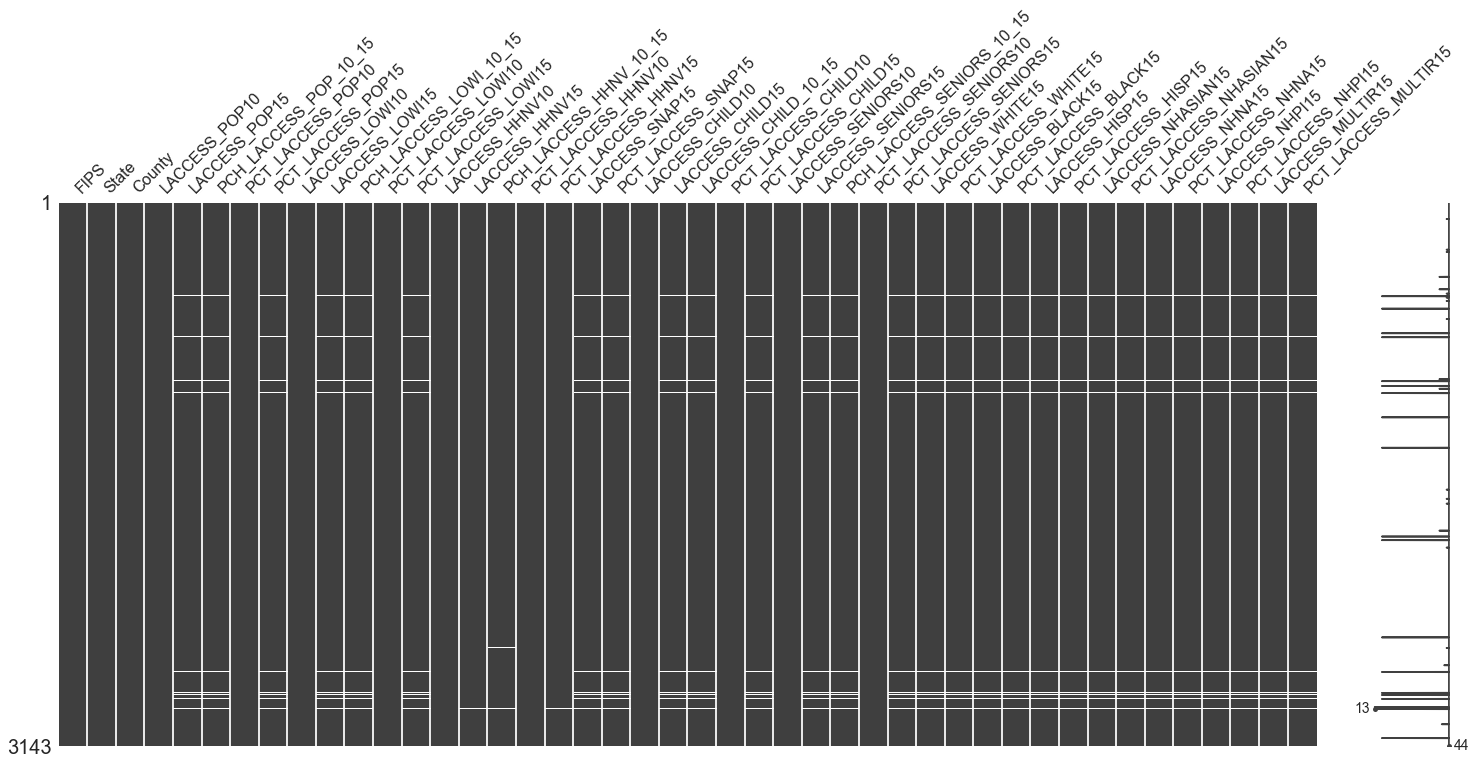

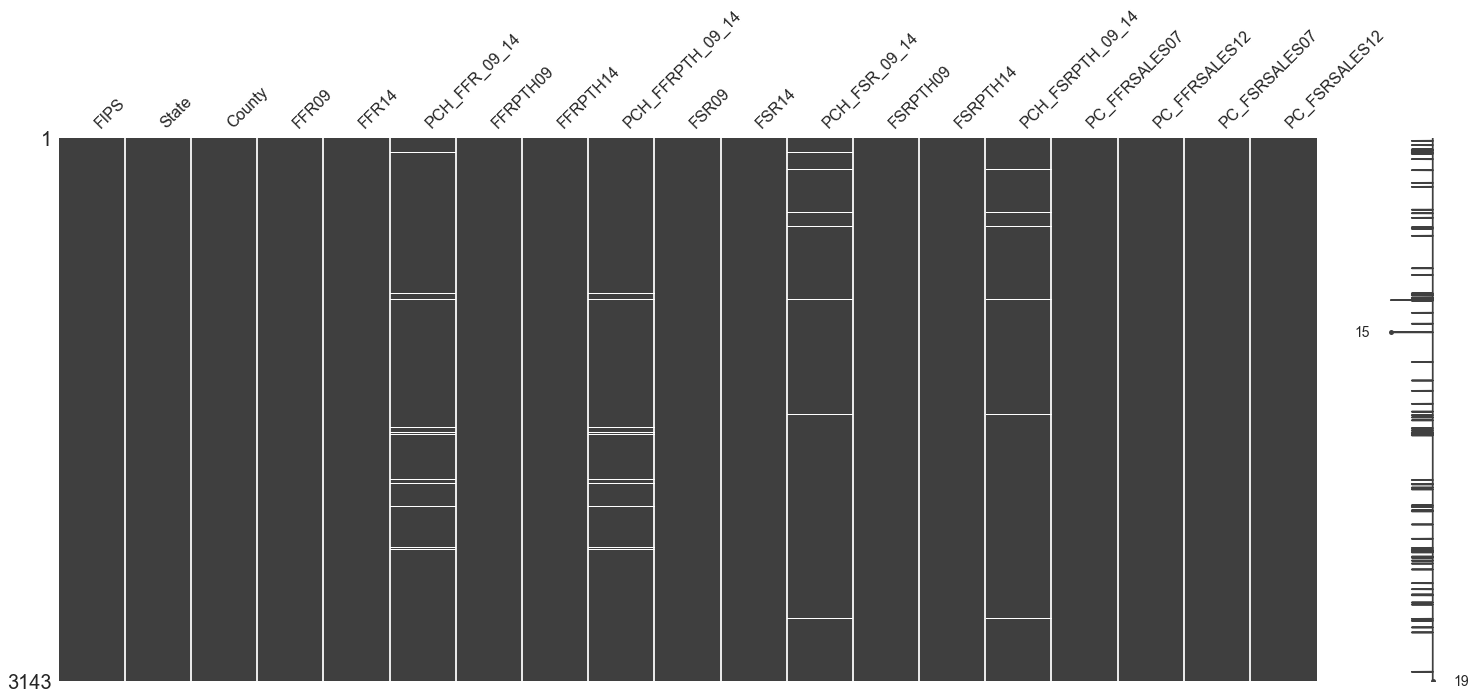

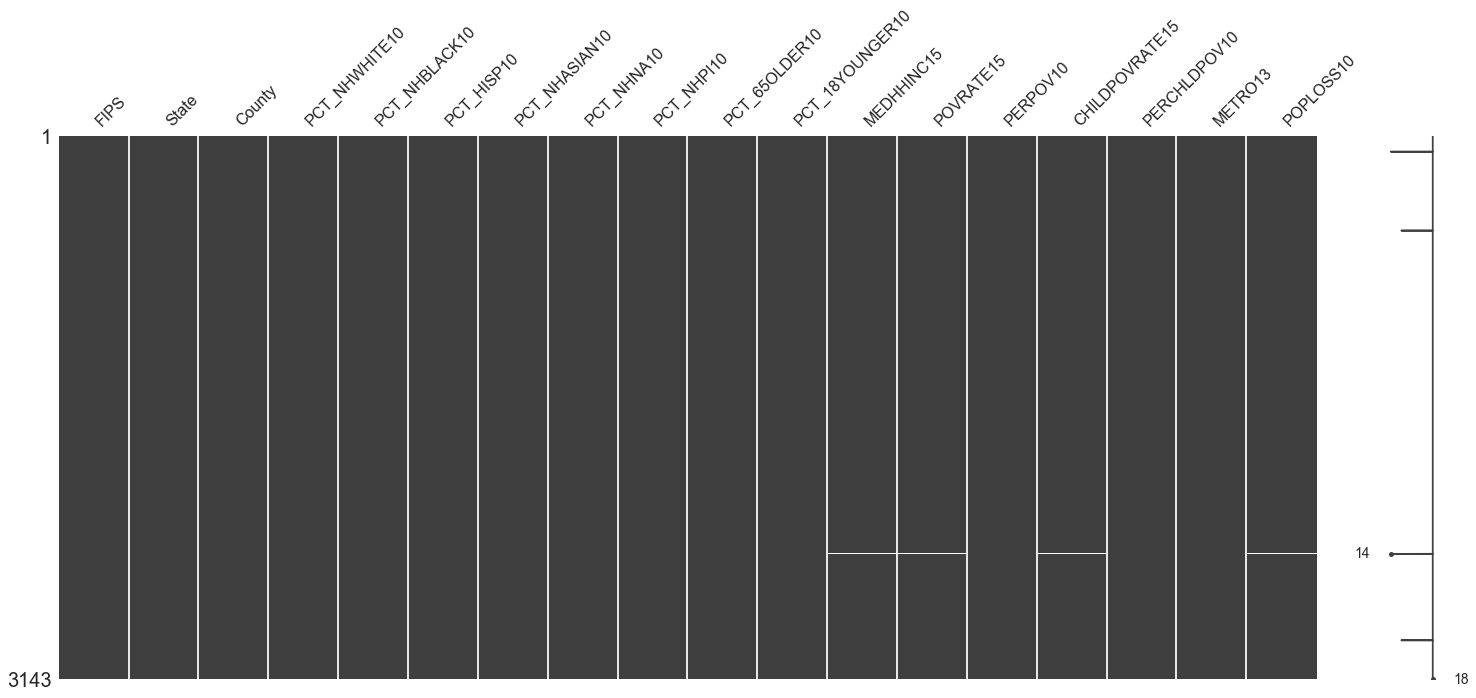

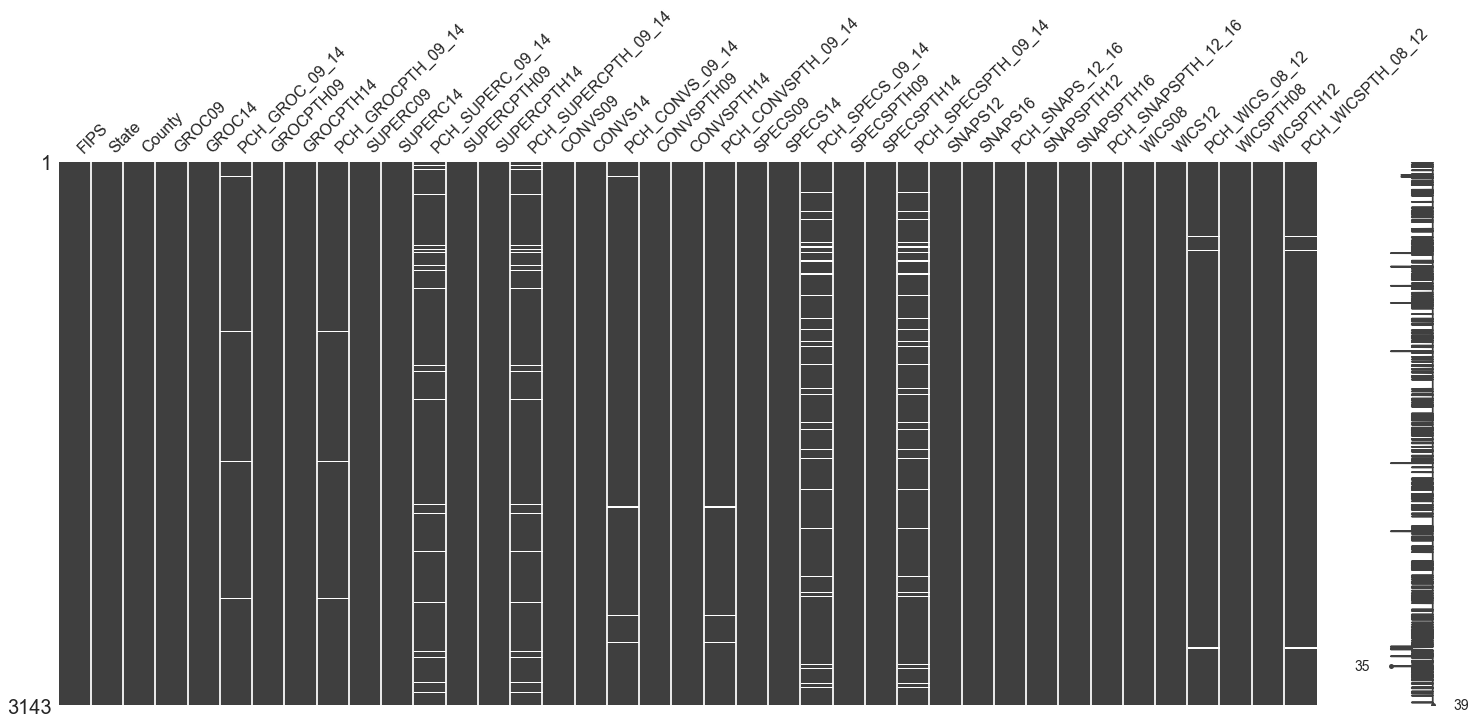

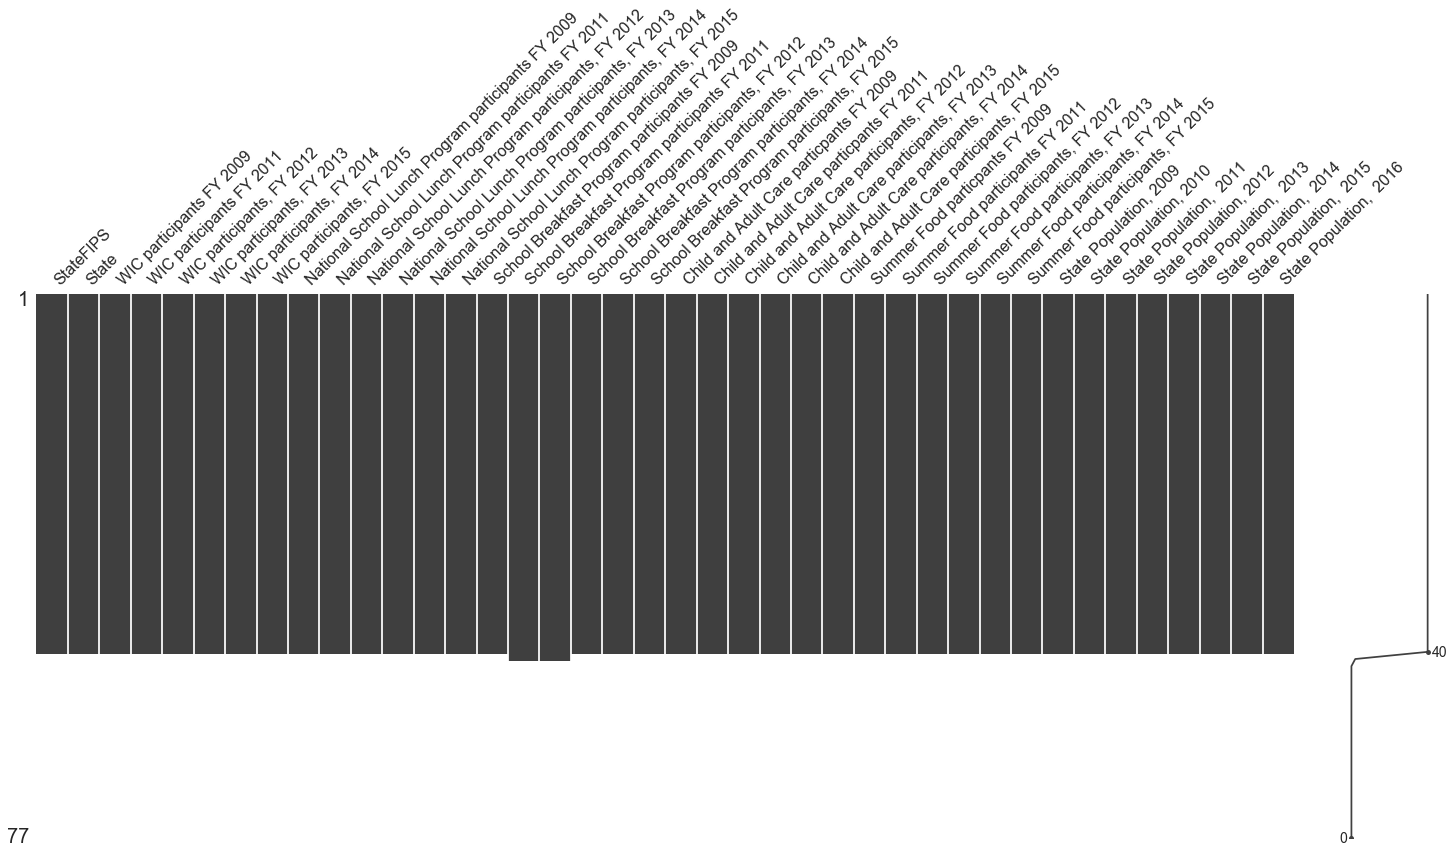

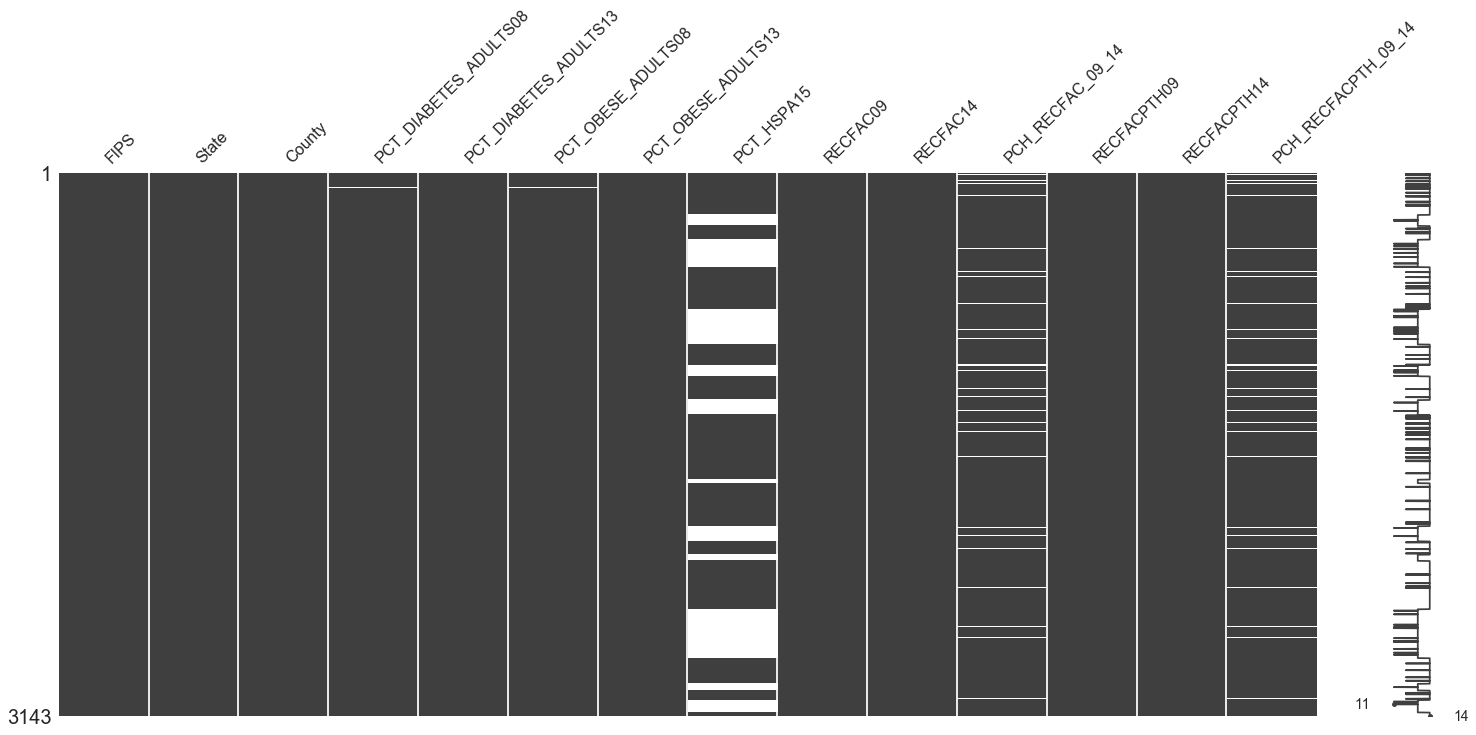

In [4]:
datasets = [access, restaurants, socioeconomic, stores, supp_state, health]
for df in datasets:
    msno.matrix(df)

In [5]:
health.drop(['PCT_HSPA15', 'PCH_RECFAC_09_14', 'PCH_RECFACPTH_09_14'], axis = 1, inplace=True)

In [6]:
drop_rows = [access, restaurants, socioeconomic, stores, supp_state, health]
for df in drop_rows:
    #print(df.shape)
    df.replace('', np.nan, inplace=True)
    df.replace('-9999', np.nan, inplace=True)
    df.dropna(axis=0, how='any', inplace=True)
    #print(df.shape)

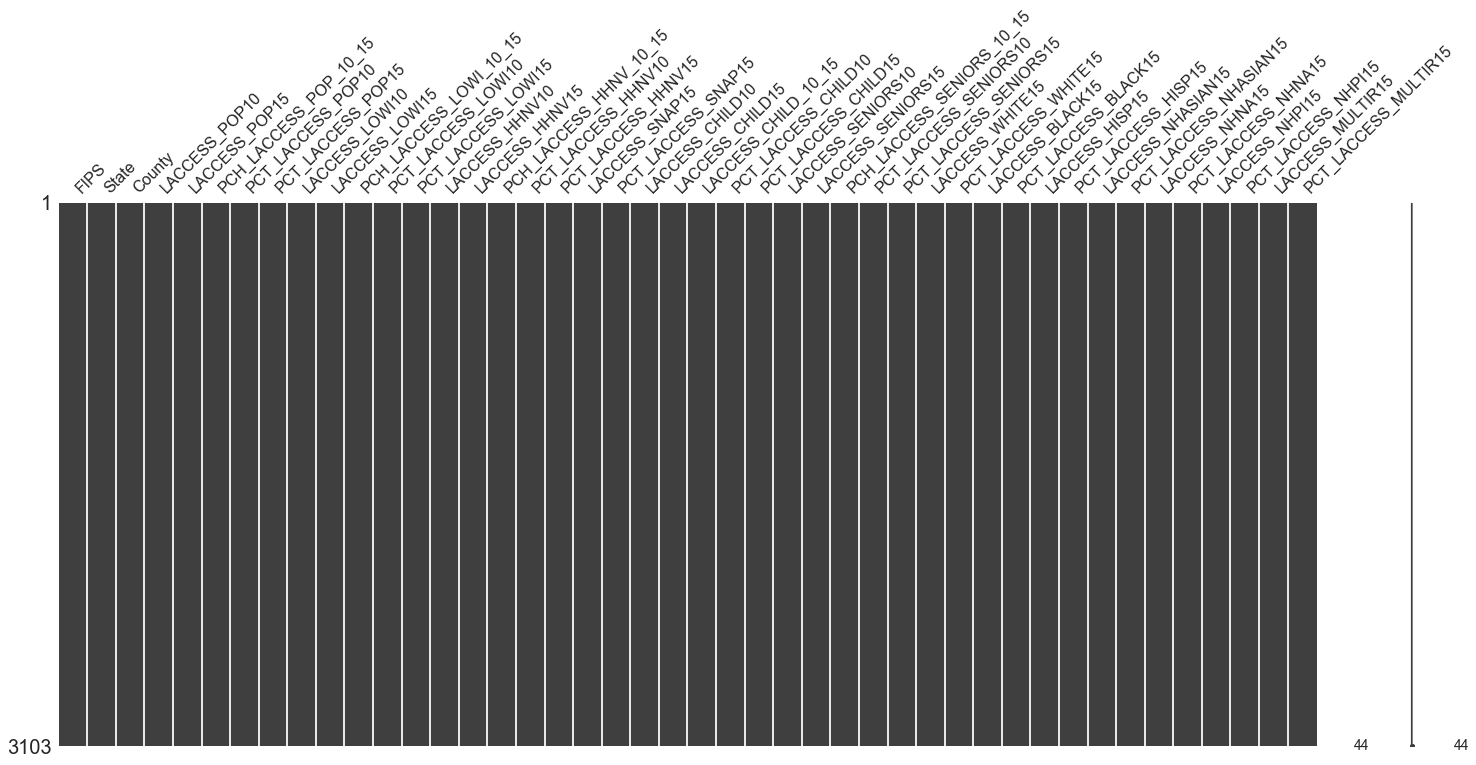

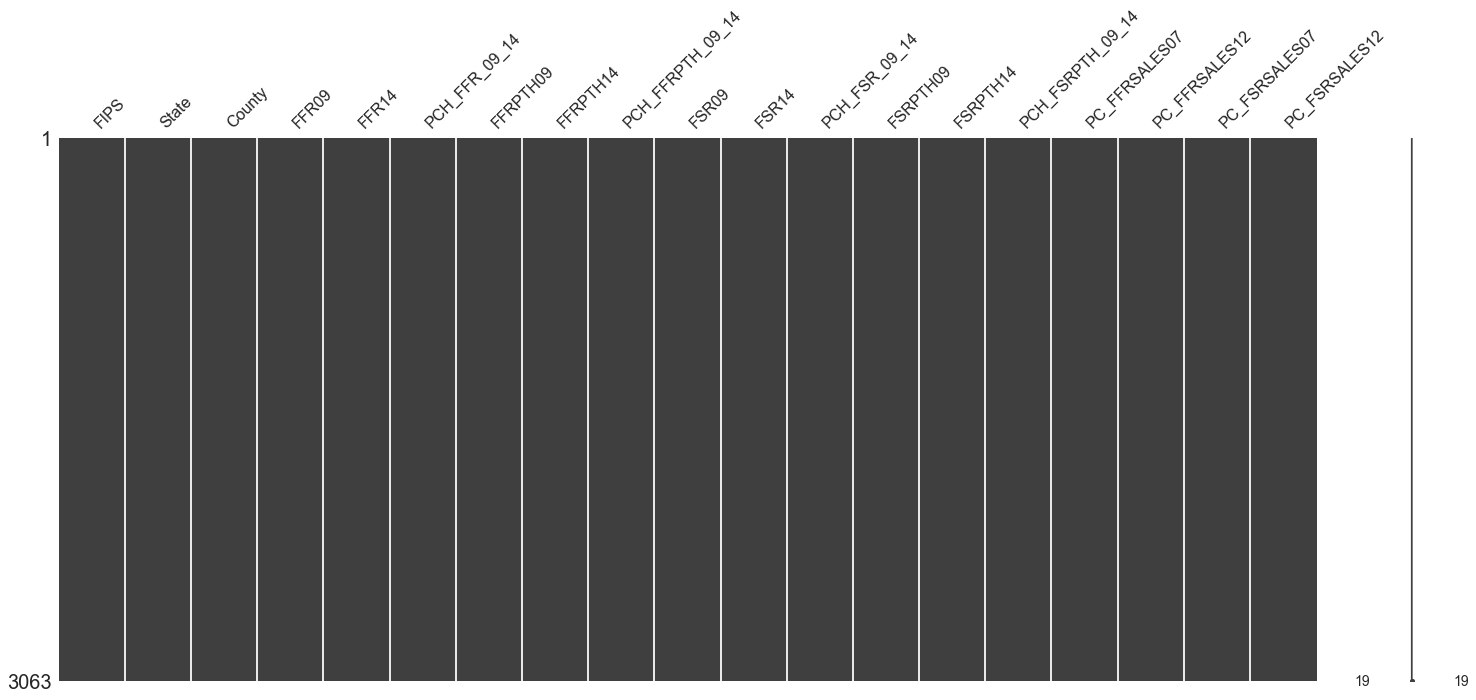

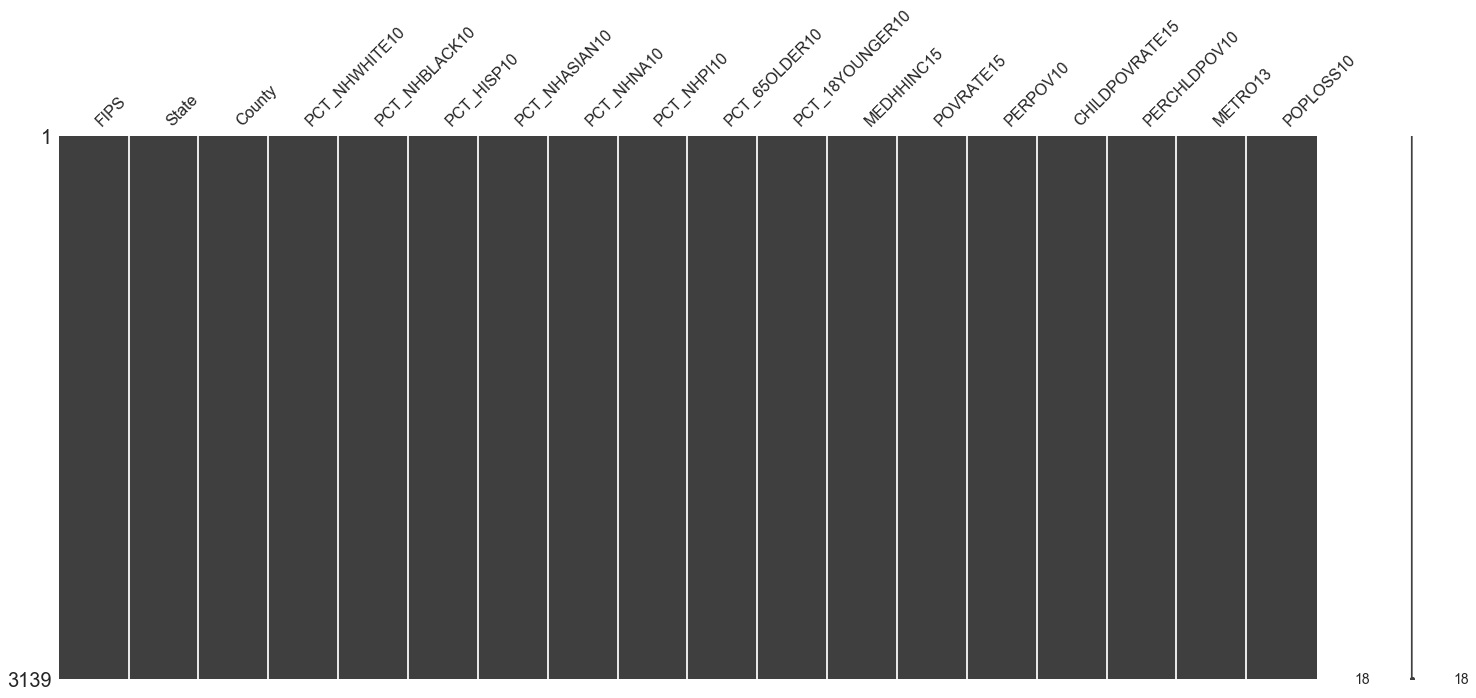

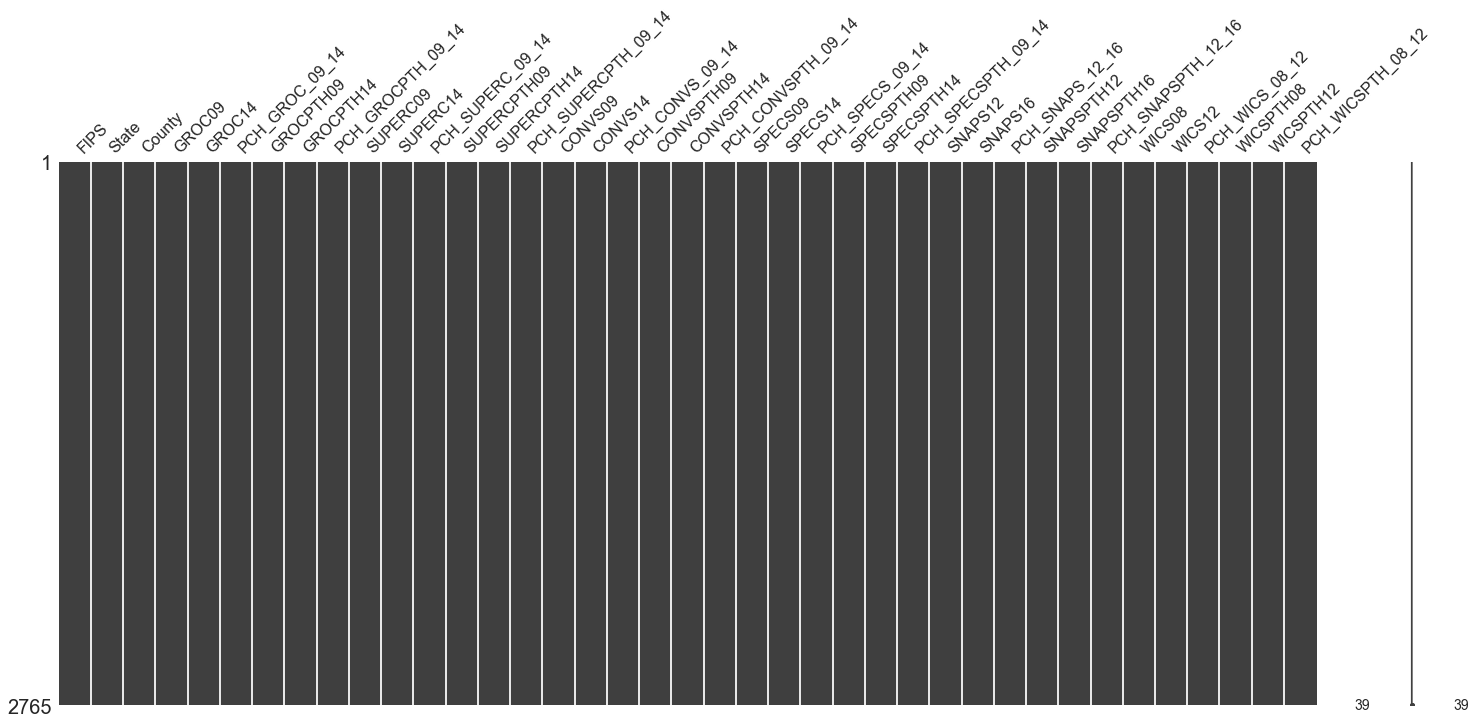

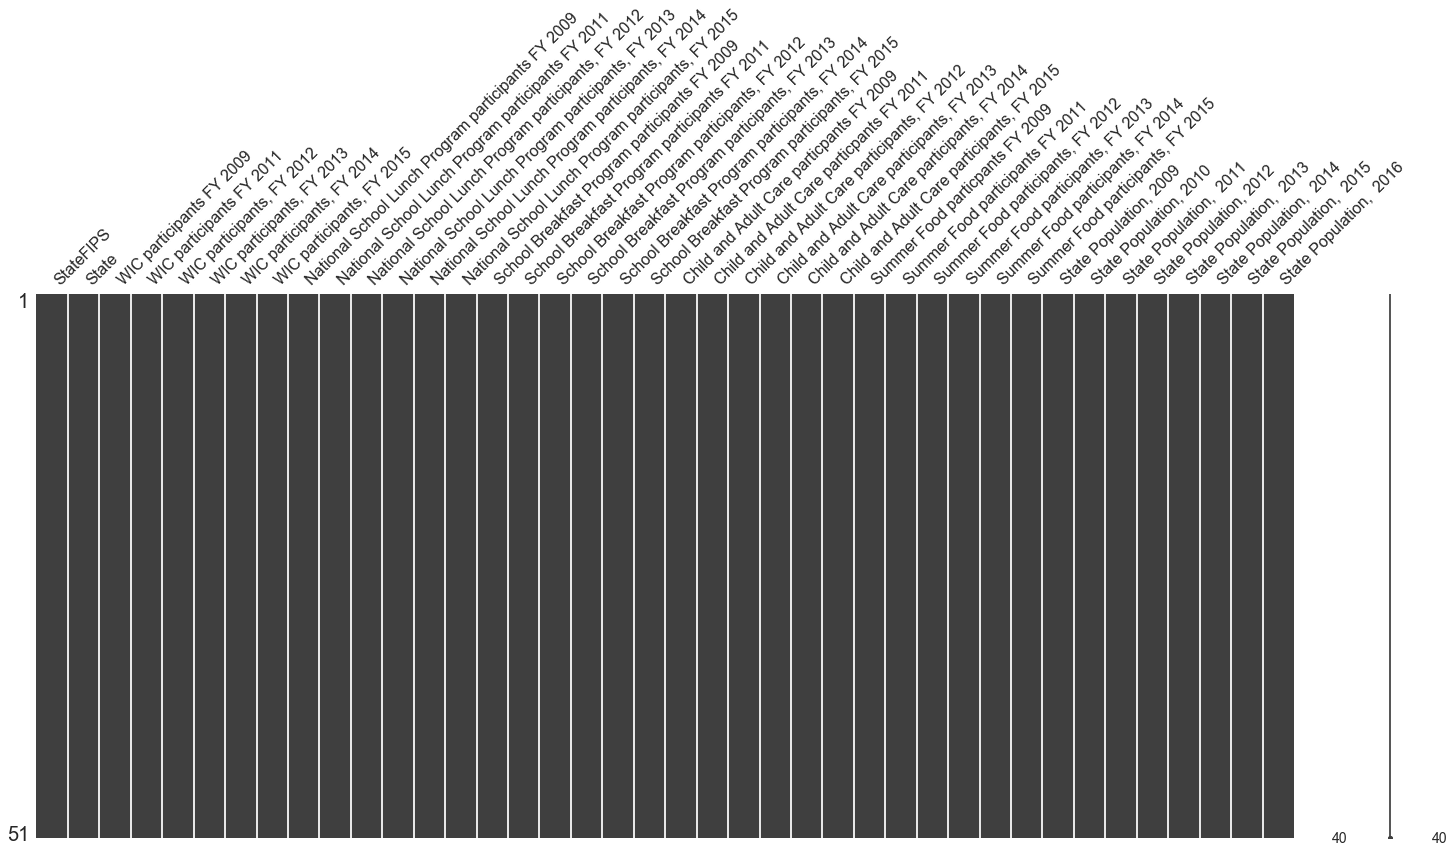

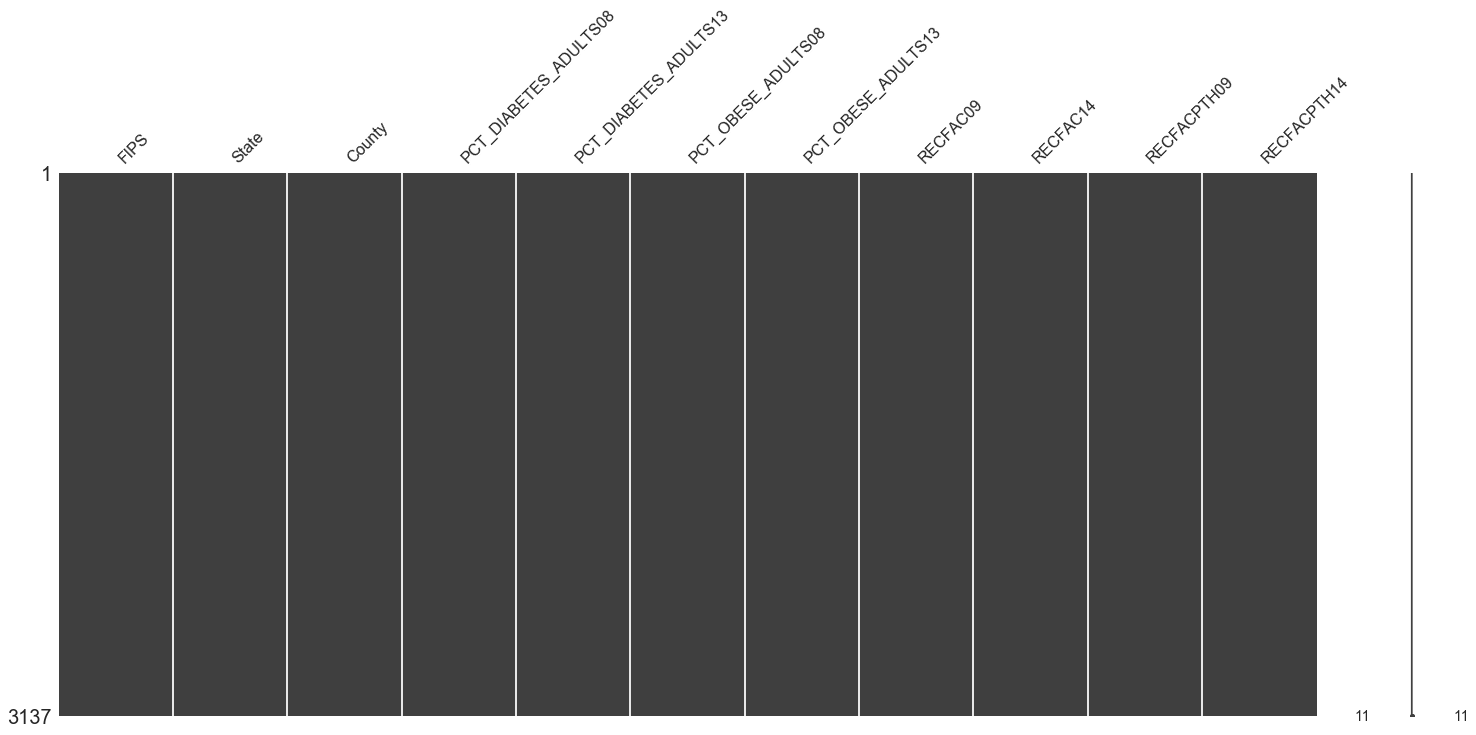

In [7]:
datasets = [access, restaurants, socioeconomic, stores, supp_state, health]
for df in datasets:
    msno.matrix(df)

Removed all missing values!

In [8]:
race = socioeconomic[['PCT_NHWHITE10', 'PCT_NHBLACK10', 'PCT_HISP10', 'PCT_NHASIAN10',\
                    'PCT_NHNA10', 'PCT_NHPI10']]
race.describe()

,PCT_NHWHITE10,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10
count,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000,3139.000000
mean,78.360313,8.753403,8.292461,1.135387,1.813536,0.064971
std,19.787545,14.426701,13.196929,2.468433,7.242930,0.368568
min,2.860408,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.014549,0.400913,1.594090,0.270060,0.194973,0.009995
50%,85.774059,1.907184,3.285739,0.463388,0.305003,0.022943
75%,94.180771,9.732428,8.235463,0.985868,0.625699,0.046468
max,99.163180,85.438778,95.744774,43.014686,86.319184,11.330297


Observe that across the nation, the percentage of racially white people is on average %78.

In [9]:
age = socioeconomic[['PCT_65OLDER10', 'PCT_18YOUNGER10']]
age.describe()

,PCT_65OLDER10,PCT_18YOUNGER10
count,3139.000000,3139.000000
mean,15.883131,23.416874
std,4.177263,3.323241
min,3.470599,9.111539
25%,13.124346,21.432273
50%,15.568674,23.327538
75%,18.202280,25.097407
max,43.384714,40.126925


Observe here that 15% of the nation is 65 and older and 23% are 18 and younger; so we can extrapolate that 62% of the population fall in between (19-64).

In [10]:
diabetes = health[['PCT_DIABETES_ADULTS08', 'PCT_DIABETES_ADULTS13']]
diabetes_avg = diabetes.copy()
diabetes_avg['Avg Diabetes'] = diabetes_avg.mean(axis=1)

low_access_store_overall = access[['PCT_LACCESS_POP10', 'PCT_LACCESS_POP15',]]
low_access_store_overall_avg = low_access_store_overall.copy()
low_access_store_overall_avg['Perc_Low_Access_To_Store'] = low_access_store_overall_avg.mean(axis=1)

groc_stores = stores[['GROC09', 'GROC14']]
groc_stores_avg = groc_stores.copy()
groc_stores_avg['Avg_groc_store'] = groc_stores_avg.mean(axis=1)

super_stores = stores[['SUPERC09', 'SUPERC14']]
super_stores_avg = super_stores.copy()
super_stores_avg['Avg_super_store'] = super_stores_avg.mean(axis=1)

conv_stores = stores[['CONVS09', 'CONVS14']]
conv_avg = conv_stores.copy()
conv_avg['Avg_conv_store'] = conv_avg.mean(axis=1)

snap_stores = stores[['SNAPS12', 'SNAPS16']]
snap_avg = snap_stores.copy()
snap_avg['Avg_snap_store'] = snap_avg.mean(axis=1)

wic_stores = stores[['WICS08', 'WICS12']]
wic_avg = wic_stores.copy()
wic_avg['Avg_wic_store'] = wic_avg.mean(axis=1)

fast_food = restaurants[['FFR09', 'FFR14']]
fast_food_avg = fast_food.copy()
fast_food_avg['Avg_fast_food'] = fast_food_avg.mean(axis=1)

full_serv = restaurants[['FSR09', 'FSR14']]
full_serv_avg = full_serv.copy()
full_serv_avg['Avg_full_serv'] = full_serv_avg.mean(axis=1)

obesity = health[['PCT_OBESE_ADULTS08', 'PCT_OBESE_ADULTS13']]
obesity_avg = obesity.copy()
obesity_avg['Avg Obesity'] = obesity_avg.mean(axis=1)

income_level = socioeconomic[['MEDHHINC15']]


In [11]:
main_df = pd.concat([access['State'],access['County'], age, race, low_access_store_overall_avg, groc_stores_avg, super_stores_avg, conv_avg,snap_avg, wic_avg, \
           fast_food_avg, full_serv_avg,income_level, diabetes_avg, obesity_avg], axis=1)
main_df.dropna()
main_df.drop(['PCT_LACCESS_POP10', 'PCT_LACCESS_POP15','GROC09', 'GROC14','SUPERC09', 'SUPERC14','CONVS09',\
              'CONVS14','SNAPS12', 'SNAPS16','WICS08', 'WICS12', 'FFR09', 'FFR14','FSR09', 'FSR14', \
              'PCT_OBESE_ADULTS08', 'PCT_OBESE_ADULTS13','PCT_DIABETES_ADULTS08','PCT_DIABETES_ADULTS13',], axis =1, inplace=True)
main_df.columns

Index(['State', 'County', 'PCT_65OLDER10', 'PCT_18YOUNGER10', 'PCT_NHWHITE10',
       'PCT_NHBLACK10', 'PCT_HISP10', 'PCT_NHASIAN10', 'PCT_NHNA10',
       'PCT_NHPI10', 'Perc_Low_Access_To_Store', 'Avg_groc_store',
       'Avg_super_store', 'Avg_conv_store', 'Avg_snap_store', 'Avg_wic_store',
       'Avg_fast_food', 'Avg_full_serv', 'MEDHHINC15', 'Avg Diabetes',
       'Avg Obesity'],
      dtype='object')

In [12]:
state_df = main_df[['State' ,'Avg Obesity']].groupby(main_df['State']).mean()
state_df.reset_index(inplace = True)

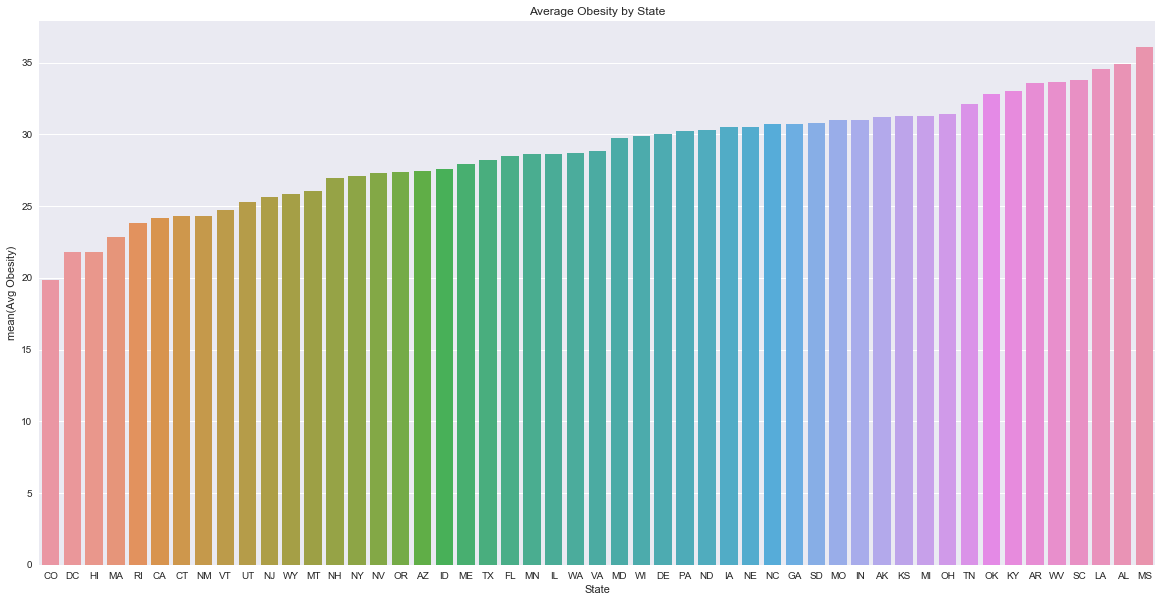

In [13]:
state_df = state_df.sort_values(by = ['Avg Obesity'])
plt.figure(figsize = (20, 10))
plt.title('Average Obesity by State')
sns.barplot(x = state_df['State'], y = state_df['Avg Obesity'])

We notice that the states with higher obesity rates are clustered in the South and Midwest regions of the United States. Let's define a categorical variable, 'central', which is one for states in the South and Midwest census regions and is zero for all other states.

In [14]:
east_north_central = ['IL', 'IN', 'MI', 'OH', 'WI']
west_north_central = ['IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD']
south_atlantic = ['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'WV']
east_south_central = ['AL', 'KY', 'MS', 'TN']
west_south_central = ['AR', 'LA', 'OK', 'TX']
central = ['IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD', 'DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'WV', 'AL', 'KY', 'MS', 'TN', 'AR', 'LA', 'OK', 'TX']

In [33]:
central_array = [0] * main_df.shape[0]
for i in range(main_df.shape[0]):
    central_array[i] = (1 if main_df['State'][i] in central else 0)
main_df['central'] = central_array
main_df.rename(columns = {'Avg Diabetes': 'Avg_diabetes', 'Avg Obesity': 'Avg_obesity'}, inplace = True)
main_df.groupby('central').mean()

,PCT_65OLDER10,PCT_18YOUNGER10,PCT_NHWHITE10,PCT_NHBLACK10,PCT_HISP10,PCT_NHASIAN10,PCT_NHNA10,PCT_NHPI10,Perc_Low_Access_To_Store,Avg_groc_store,Avg_super_store,Avg_conv_store,Avg_snap_store,Avg_wic_store,Avg_fast_food,Avg_full_serv,MEDHHINC15,Avg_diabetes,Avg_obesity
central,,,,,,,,,,,,,,,,,,,
0,15.278106,23.042462,77.390853,2.530458,12.292812,2.197873,3.306226,0.163951,26.794935,46.444444,2.347021,59.518519,139.063875,28.684380,138.013235,154.577206,53658.214900,8.730647,26.315540
1,16.056137,23.523937,78.637529,10.532845,7.148567,0.831570,1.386703,0.036667,22.338178,14.467817,1.525187,37.036614,66.138196,11.778218,52.769408,52.426773,47168.022122,11.102887,31.014947


In [16]:
from patsy import dmatrices
y_1, X_1 = dmatrices('central ~ Avg_obesity', main_df, return_type = "dataframe")
y_1 = np.ravel(y_1)

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'newton-cg')
model = model.fit(X_1, y_1)
model.score(X_1, y_1)

0.84666879183933696

Our logistic regression using the average obesity feature performs better than the null error rate (0.84348103283391773 > 0.77696468342).

In [19]:
pd.DataFrame(list(zip(X_1.columns, np.transpose(model.coef_))))

,0,1
0,Intercept,[-1.37314537182e-13]
1,Avg_obesity,[0.40374635762]


Increases in average obesity correspond to a higher likelihood of the measured state being central, since Avg_obesity has a positive coefficient.

In [20]:
y_2, X_2 = dmatrices('central ~ Avg_obesity + Perc_Low_Access_To_Store + Avg_groc_store + Avg_super_store + Avg_conv_store + Avg_snap_store + Avg_wic_store + Avg_fast_food + Avg_full_serv + MEDHHINC15 + Avg_diabetes', main_df, return_type = "dataframe")
y_2 = np.ravel(y_2)
model2 = LogisticRegression(solver = 'newton-cg', max_iter = 200)
model2 = model2.fit(X_2, y_2)
model2.score(X_2, y_2)

/Users/Family/anaconda/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Family/anaconda/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Family/anaconda/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


0.86350037397157819

In [22]:
pd.DataFrame(list(zip(X_2.columns, np.transpose(model2.coef_))))

,0,1
0,Intercept,[-0.0218261177029]
1,Avg_obesity,[0.281554356561]
2,Perc_Low_Access_To_Store,[-0.00286076718001]
3,Avg_groc_store,[-0.0186417242319]
4,Avg_super_store,[-0.0366337337684]
5,Avg_conv_store,[0.0209563671292]
6,Avg_snap_store,[-0.00865681874418]
7,Avg_wic_store,[0.0113839089534]
8,Avg_fast_food,[0.0060467962961]
9,Avg_full_serv,[-0.00397226274554]


Without using age or race predictor variables, we can predict whether the state is central with accuracy = 0.86350037397157819, outperforming our initial model slightly. The coefficient values of Avg_obesity and Avg_diabetes are both positive, indicating an increase in these features increases the likelihood the state is central.

In [29]:
y_3, X_3 = dmatrices('central ~ PCT_65OLDER10 + PCT_18YOUNGER10 + PCT_NHWHITE10 + PCT_NHBLACK10 + PCT_HISP10 + PCT_NHASIAN10 + PCT_NHNA10 + PCT_NHPI10 + Avg_obesity + Perc_Low_Access_To_Store + Avg_groc_store + Avg_super_store + Avg_conv_store + Avg_snap_store + Avg_wic_store + Avg_fast_food + Avg_full_serv + MEDHHINC15 + Avg_diabetes', main_df, return_type = "dataframe")
y_3 = np.ravel(y_3)
model3 = LogisticRegression(solver = 'newton-cg', max_iter = 200)
model3 = model3.fit(X_3, y_3)
model3.score(X_3, y_3)

/Users/Family/anaconda/lib/python3.6/site-packages/scipy/optimize/linesearch.py:414: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Family/anaconda/lib/python3.6/site-packages/scipy/optimize/linesearch.py:285: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/Family/anaconda/lib/python3.6/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


0.88668661181750186

In [31]:
pd.DataFrame(list(zip(X_3.columns, np.transpose(model3.coef_))))

,0,1
0,Intercept,[-0.00212372623737]
1,PCT_65OLDER10,[0.0813561803091]
2,PCT_18YOUNGER10,[0.0630600362731]
3,PCT_NHWHITE10,[0.303632595505]
4,PCT_NHBLACK10,[0.544066477568]
5,PCT_HISP10,[0.306498184588]
6,PCT_NHASIAN10,[0.283725830632]
7,PCT_NHNA10,[0.25467727325]
8,PCT_NHPI10,[-1.88025257092]
9,Avg_obesity,[0.369949651276]


With race and age predictor variables added to our regression model, we can increase the accuracy of our model to 0.88668661181750186, outperforming our original model and the null error by roughly 4 percent and 11 percent, respectively.